The following notebook is a very easy guideline to follow for creating your own ANN(Artificial Neural Network).

This is the Demonstration to do a Binary Classification Model using Keras
For the purpose of the Demo we have used a Public Dataset: /home/rjain201/Keras_Demo_hackathon/Churn_Modelling.csv
The DataSet is a customer churn data for a certain bank.
It is small(for learning purpose) and contains 10000 rows with 14 columns.
    

# 1. Input Libraries

In [73]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
from keras import regularizers
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras import optimizers


# 2. Data Input

In [74]:
df = pd.read_table('C:/Users/rjain201/Desktop/office/keras/Churn_Modelling.csv', sep = ',', error_bad_lines=False)
vars=df.dtypes
categorical=[]
numeric=[]
for i in range(0,len(vars)):
    if vars[i]=="object": 
        categorical.append(df.columns[i])
    else:
        numeric.append(df.columns[i]) 
#data processing
from sklearn.preprocessing import LabelEncoder
import numpy as np
df1=df[categorical]
df2=df[numeric]
df2=df2.fillna(value=0)
df1=df1.fillna(value="others")

# 3. Variable Processing

## 3.a Correlation Matrix

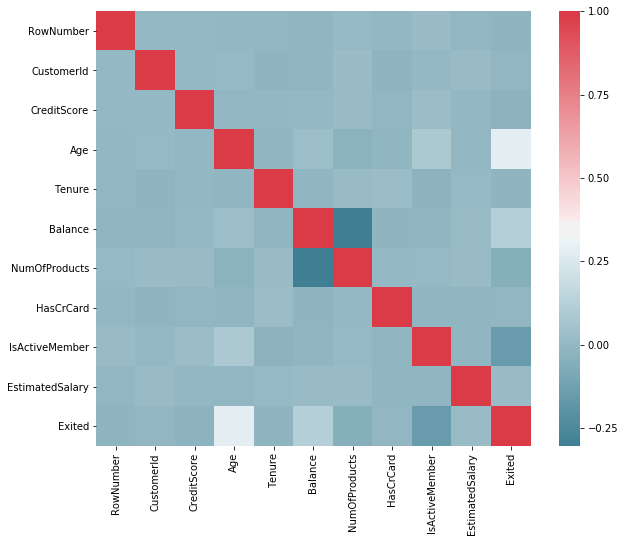

In [14]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = df2.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

## 3.b Variable Distribution

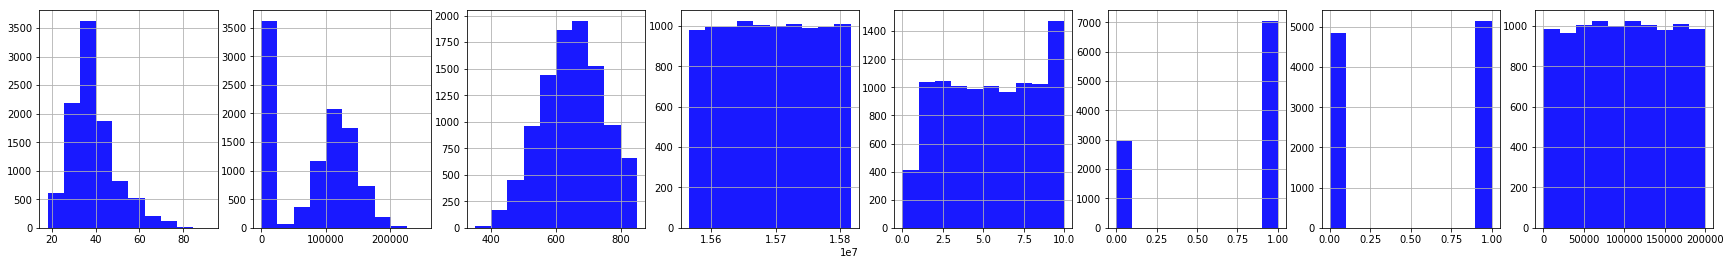

In [15]:
fig, axes = plt.subplots(1, 8, figsize=(30,4))
(df2['Age']).hist(ax=axes[0], alpha=0.9, color='blue')
(df2['Balance']).hist(ax=axes[1], alpha=0.9, color='blue')
(df2['CreditScore']).hist(ax=axes[2], alpha=0.9, color='blue')
(df2['CustomerId']).hist(ax=axes[3], alpha=0.9, color='blue')
(df2['Tenure']).hist(ax=axes[4], alpha=0.9, color='blue')
(df2['HasCrCard']).hist(ax=axes[5], alpha=0.9, color='blue')
(df2['IsActiveMember']).hist(ax=axes[6], alpha=0.9, color='blue')
(df2['EstimatedSalary']).hist(ax=axes[7], alpha=0.9, color='blue')

#h1=h1.replace([np.inf, -np.inf], np.nan).dropna()
#h2=np.log(df1['hsd_tier_name_T'])



## 3.c Label Encoding Categorical Variables

In [75]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#for country column
labelencoder_X_1 = LabelEncoder()
df1['Geography'] = labelencoder_X_1.fit_transform(df1['Geography'])
#for gender column
labelencoder_X_2 = LabelEncoder()
df1['Gender'] = labelencoder_X_2.fit_transform(df1['Gender'])
df3=pd.concat([df2,df1], axis=1)
df3=df3.drop(['Surname','CustomerId'], axis=1)
Y=np.array(df3['Exited'])
df3=df3.drop('Exited', axis=1)
X=np.array(df3)


## 3.d Standard Scaling 

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df3)
X=scaler.transform(df3)
#split into train and testing
from sklearn import cross_validation
validation_size = 0.3
seed = 7
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# 4. Our Traditional logistic Regression Model

Optimization terminated successfully.
         Current function value: 0.448339
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Sun, 15 Apr 2018   Pseudo R-squ.:                  0.1131
Time:                        21:02:21   Log-Likelihood:                -4483.4
converged:                       True   LL-Null:                       -5054.9
                                        LLR p-value:                2.833e-239
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.5858      0.088     -6.689      0.000      -0.757      -0.414
x2            -1.5603      0.

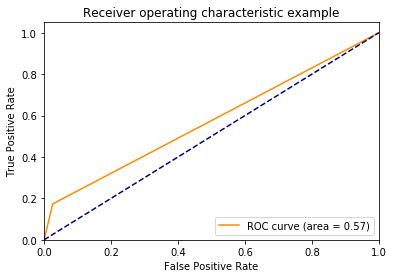

In [71]:
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_validation)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_validation, Y_validation)))
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr1, tpr1, _ = roc_curve(Y_validation, y_pred)
roc_auc1 = auc(fpr1, tpr1)
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# 5. First NN Baseline Model 

3000/3000 [==============================] - 0s 35us/step
Accuracy:  81.9999999841
loss: 42.7380676985


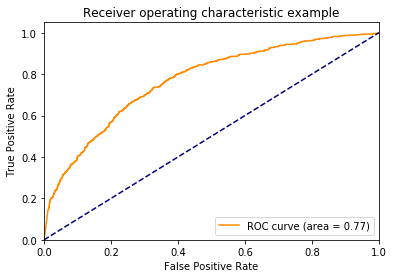

In [29]:
Model = Sequential()

Model.add(Dense(4, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
Model.add(Dense(1, kernel_initializer  = 'uniform', activation = 'sigmoid'))

# Compiling Neural Network
Model.compile(optimizer = "adam" , loss = 'binary_crossentropy', metrics = ['accuracy'])

#fitting the neural Network
history=Model.fit(X_train, Y_train,  batch_size=32, epochs = 50, verbose=1, validation_split=0.2 , shuffle=True)
score = Model.evaluate(X_validation, Y_validation, verbose=1)
print('Accuracy: ', score[1]*100)
print( 'loss:', score[0]*100)
y_pred = Model.predict_proba(X_validation)
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr1, tpr1, _ = roc_curve(Y_validation, y_pred)
roc_auc1 = auc(fpr1, tpr1)
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## 5.a Plot the performance of the baseline model

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


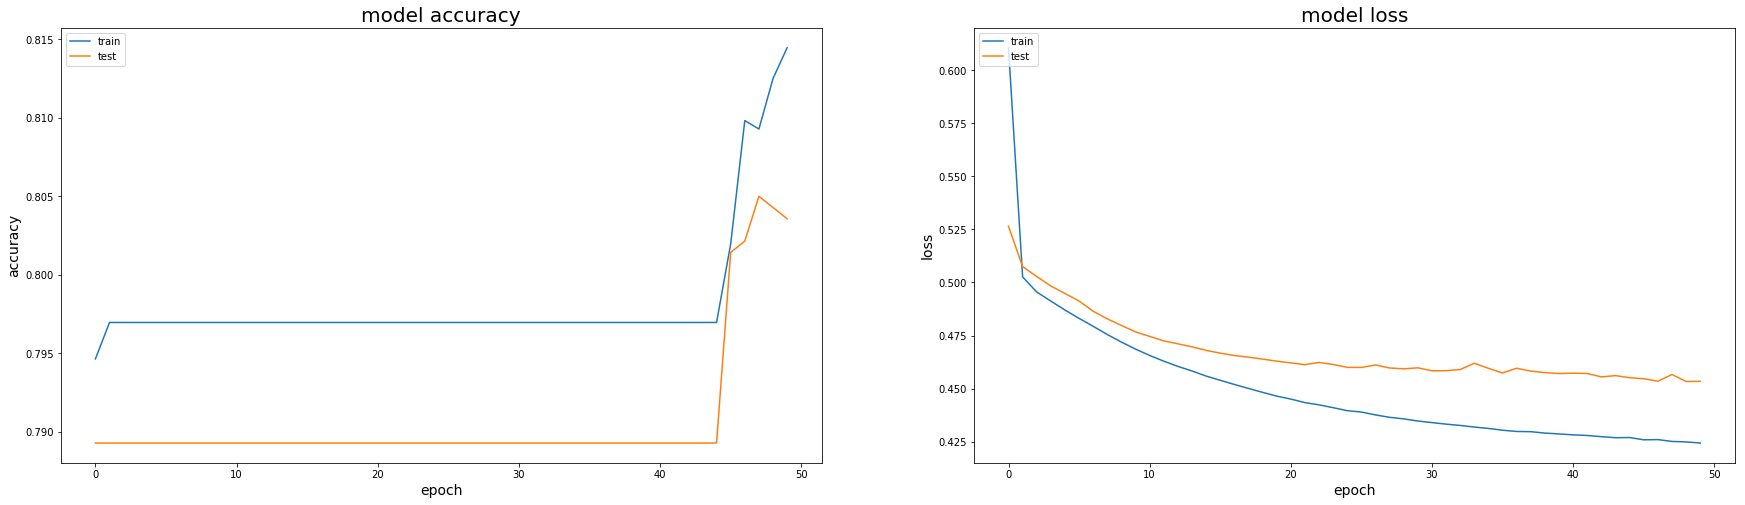

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(30, 8))
print(history.history.keys())
# summarize history for accuracy
ax1.plot(history.history['acc'])
ax1.plot(history.history['val_acc'])
ax1.set_title(' Baseline model accuracy', fontsize=20)
ax1.set_ylabel('accuracy', fontsize=14)
ax1.set_xlabel('epoch', fontsize=14)
ax1.legend(['train', 'test'], loc='upper left')
#ax1.show()
# summarize history for loss
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Baseline model loss', fontsize=20)
ax2.set_ylabel('loss', fontsize=14)
ax2.set_xlabel('epoch', fontsize=14)
ax2.legend(['train', 'test'], loc='upper left')
#ax2.show()

# 6. Evaluate a Deeper Network Topology

In [32]:
Model1 = Sequential()
Model1.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
Model1.add(Dense(4, kernel_initializer = 'uniform', activation = 'relu'))
Model1.add(Dense(1, kernel_initializer  = 'uniform', activation = 'sigmoid'))
Model1.compile(optimizer = "adam" , loss = 'binary_crossentropy', metrics = ['accuracy'])
history1=Model1.fit(X_train, Y_train,  batch_size=32, epochs = 50, verbose=0, validation_split=0.1, shuffle=True)
score1 = Model1.evaluate(X_validation, Y_validation, verbose=1)
print('Accuracy: ', score1[1]*100)
print( 'loss:', score1[0]*100)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(30, 8))
# summarize history for accuracy
ax1.plot(history1.history['acc'])
ax1.plot(history1.history['val_acc'])
ax1.set_title('Deeper model accuracy', fontsize=14)
ax1.set_ylabel('accuracy', fontsize=14)
ax1.set_xlabel('epoch', fontsize=14)
ax1.legend(['train', 'test'], loc='upper left')
# summarize history for loss
ax2.plot(history1.history['loss'])
ax2.plot(history1.history['val_loss'])
ax2.set_title('Deeper model loss', fontsize=14)
ax2.set_ylabel('loss', fontsize=14)
ax2.set_xlabel('epoch', fontsize=14)
ax2.legend(['train', 'test'], loc='upper left')

3000/3000 [==============================] - 0s 28us/step
Accuracy:  83.3333333333
loss: 40.9279863278


# 8. Evaluate a Wider Network Topology

3000/3000 [==============================] - 0s 32us/step
Accuracy:  85.5333333492
loss: 35.2233010491


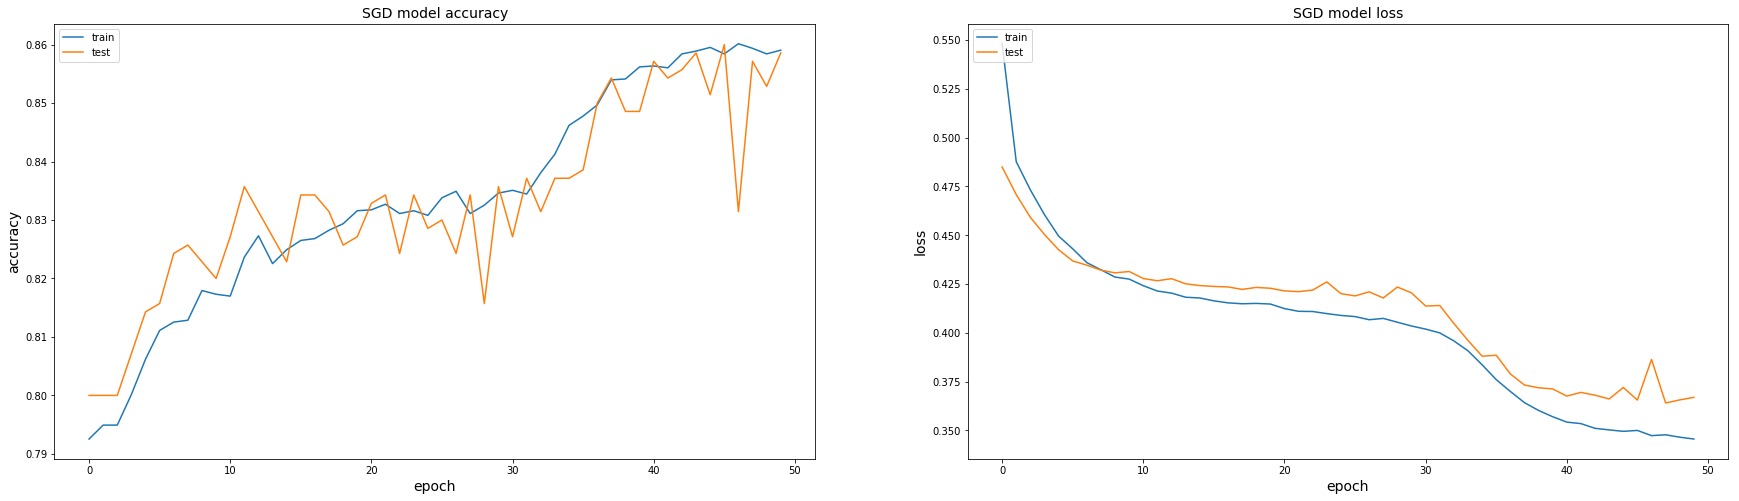

In [45]:
Model4 = Sequential()
Model4.add(Dense(32, kernel_initializer = 'uniform', activation = 'relu',input_dim = 11))
Model4.add(Dense(16, kernel_initializer = 'uniform', activation = 'relu'))
Model4.add(Dense(1, kernel_initializer  = 'uniform', activation = 'sigmoid'))
Model4.compile(optimizer = 'adam' , loss = 'binary_crossentropy', metrics = ['accuracy'])
#fitting the neural Network
history4=Model4.fit(X_train, Y_train,  batch_size=32, epochs = 50, verbose=0, validation_split=0.1, shuffle=True)
score4 = Model4.evaluate(X_validation, Y_validation, verbose=1)
print('Accuracy: ', score4[1]*100)
print( 'loss:', score4[0]*100)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(30, 8))
# summarize history for accuracy
ax1.plot(history4.history['acc'])
ax1.plot(history4.history['val_acc'])
ax1.set_title('Wider model accuracy', fontsize=14)
ax1.set_ylabel('accuracy', fontsize=14)
ax1.set_xlabel('epoch', fontsize=14)
ax1.legend(['train', 'test'], loc='upper left')
# summarize history for loss
ax2.plot(history4.history['loss'])
ax2.plot(history4.history['val_loss'])
ax2.set_title('Wider model loss', fontsize=14)
ax2.set_ylabel('loss', fontsize=14)
ax2.set_xlabel('epoch', fontsize=14)
ax2.legend(['train', 'test'], loc='upper left')

# 7. Changing the optimizers

In [77]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
Model2 = Sequential()
Model2.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu',input_dim = 11))
Model2.add(Dense(1, kernel_initializer  = 'uniform', activation = 'sigmoid'))

## 7.a SGD

3000/3000 [==============================] - 0s 99us/step
Accuracy:  83.7333333333
loss: 41.0172716856
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


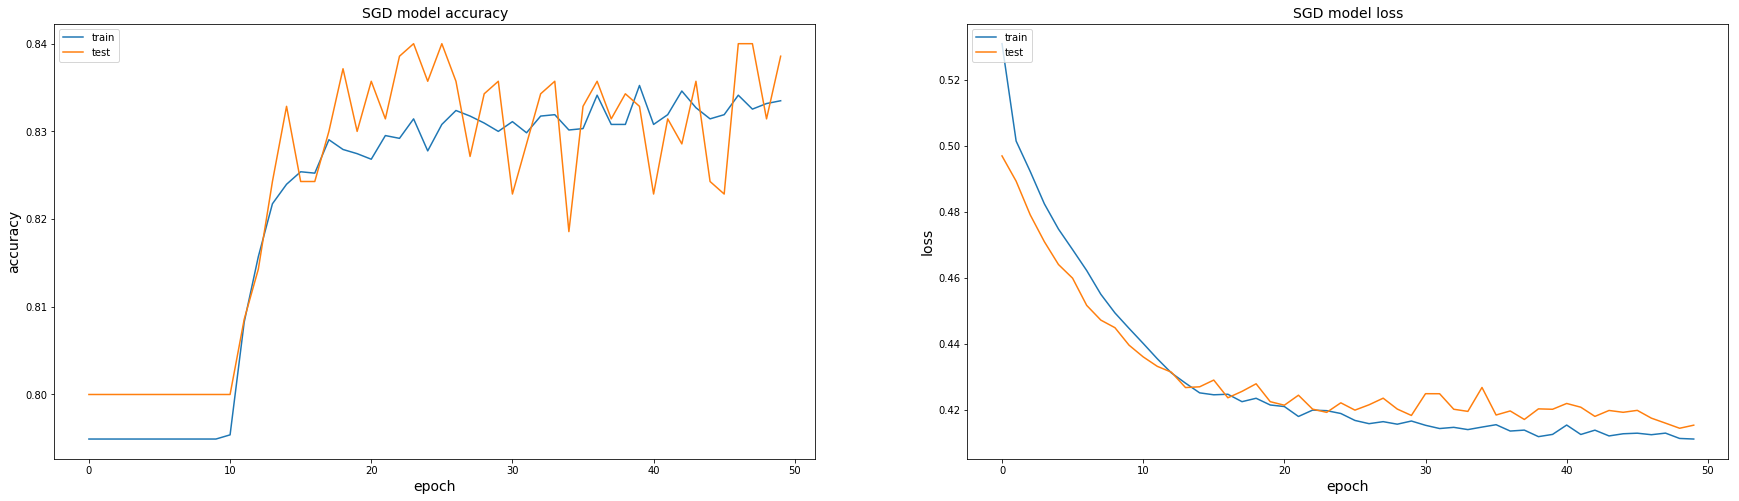

In [78]:
from keras.optimizers import SGD
sgd = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)
Model2.compile(optimizer = sgd , loss = 'binary_crossentropy', metrics = ['accuracy'])
#fitting the neural Network
history2=Model2.fit(X_train, Y_train,  batch_size=32, epochs = 50, verbose=0, validation_split=0.1, shuffle=True)
score2 = Model2.evaluate(X_validation, Y_validation, verbose=1)
print('Accuracy: ', score2[1]*100)
print( 'loss:', score2[0]*100)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(30, 8))
print(history.history.keys())
# summarize history for accuracy
ax1.plot(history2.history['acc'])
ax1.plot(history2.history['val_acc'])
ax1.set_title('SGD model accuracy', fontsize=14)
ax1.set_ylabel('accuracy', fontsize=14)
ax1.set_xlabel('epoch', fontsize=14)
ax1.legend(['train', 'test'], loc='upper left')
# summarize history for loss
ax2.plot(history2.history['loss'])
ax2.plot(history2.history['val_loss'])
ax2.set_title('SGD model loss', fontsize=14)
ax2.set_ylabel('loss', fontsize=14)
ax2.set_xlabel('epoch', fontsize=14)
ax2.legend(['train', 'test'], loc='upper left')

## 7.b RMS

Train on 6300 samples, validate on 700 samples
Epoch 1/5
6300/6300 [==============================] - 3s 523us/step - loss: 0.3448 - acc: 0.8583 - val_loss: 0.3603 - val_acc: 0.8571
Epoch 2/5
6300/6300 [==============================] - 1s 175us/step - loss: 0.3440 - acc: 0.8597 - val_loss: 0.3645 - val_acc: 0.8586
Epoch 3/5
6300/6300 [==============================] - 1s 155us/step - loss: 0.3437 - acc: 0.8595 - val_loss: 0.3655 - val_acc: 0.8571
Epoch 4/5
6300/6300 [==============================] - 1s 145us/step - loss: 0.3432 - acc: 0.8576 - val_loss: 0.3676 - val_acc: 0.8500
Epoch 5/5
3000/3000 [==============================] - 0s 90us/step
Accuracy:  85.1666666826
loss: 35.4025310795


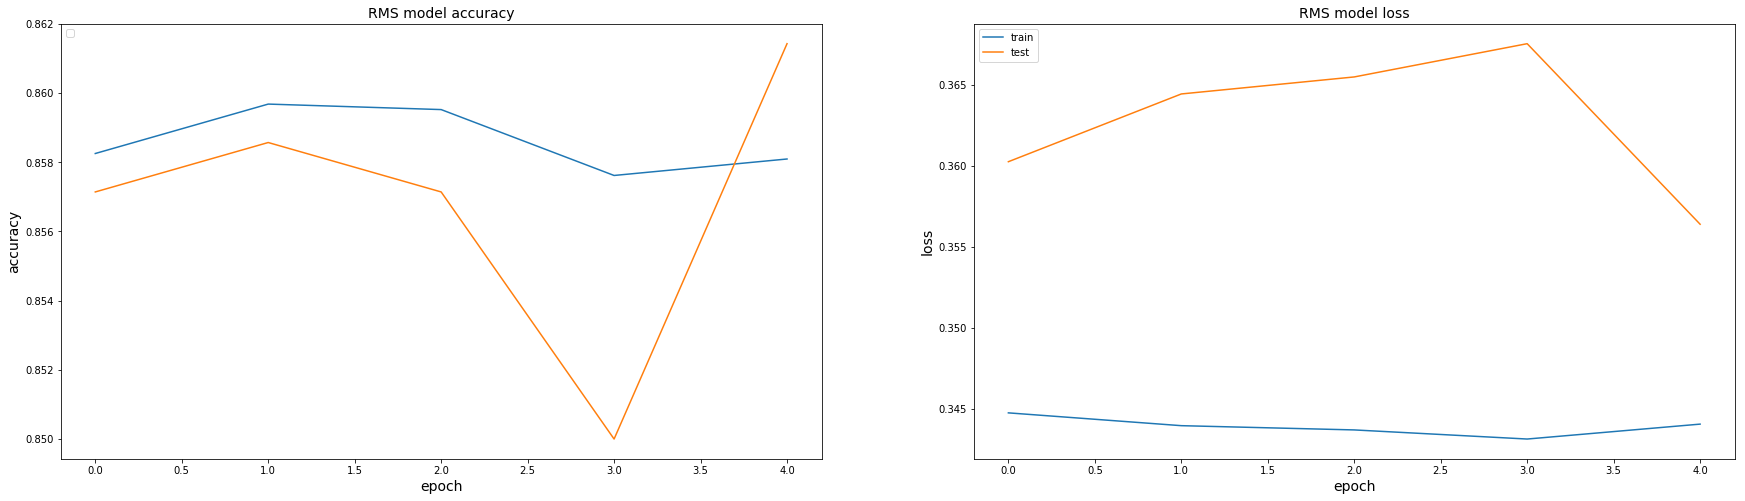

In [80]:
from keras.optimizers import RMSprop
RMS=RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.00)
Model2.compile(optimizer = RMS , loss = 'binary_crossentropy', metrics = ['accuracy'])
#fitting the neural Network
history3=Model2.fit(X_train, Y_train,  batch_size=32, epochs = 5, verbose=1, validation_split=0.1, shuffle=True)
score3 = Model2.evaluate(X_validation, Y_validation, verbose=1)
print('Accuracy: ', score3[1]*100)
print( 'loss:', score3[0]*100)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(30, 8))
# summarize history for accuracy
ax1.set_title('RMS model accuracy', fontsize=14)
ax1.set_ylabel('accuracy', fontsize=14)
ax1.set_xlabel('epoch', fontsize=14)
ax1.set_xlabel('epoch', fontsize=14)
ax1.legend(['train', 'test'], loc='upper left')
ax1.plot(history3.history['acc'])
ax1.plot(history3.history['val_acc'])
# summarize history for loss
ax2.plot(history3.history['loss'])
ax2.plot(history3.history['val_loss'])
ax2.set_title('RMS model loss', fontsize=14)
ax2.set_ylabel('loss', fontsize=14)
ax2.set_xlabel('epoch', fontsize=14)
ax2.legend(['train', 'test'], loc='upper left')

# 9. Overfitting: Drop Out ,Regularization, Learning Rate & Early Stopping

### 9.a DropOut

3000/3000 [==============================] - 0s 35us/step
Accuracy:  83.9
loss: 40.764672637


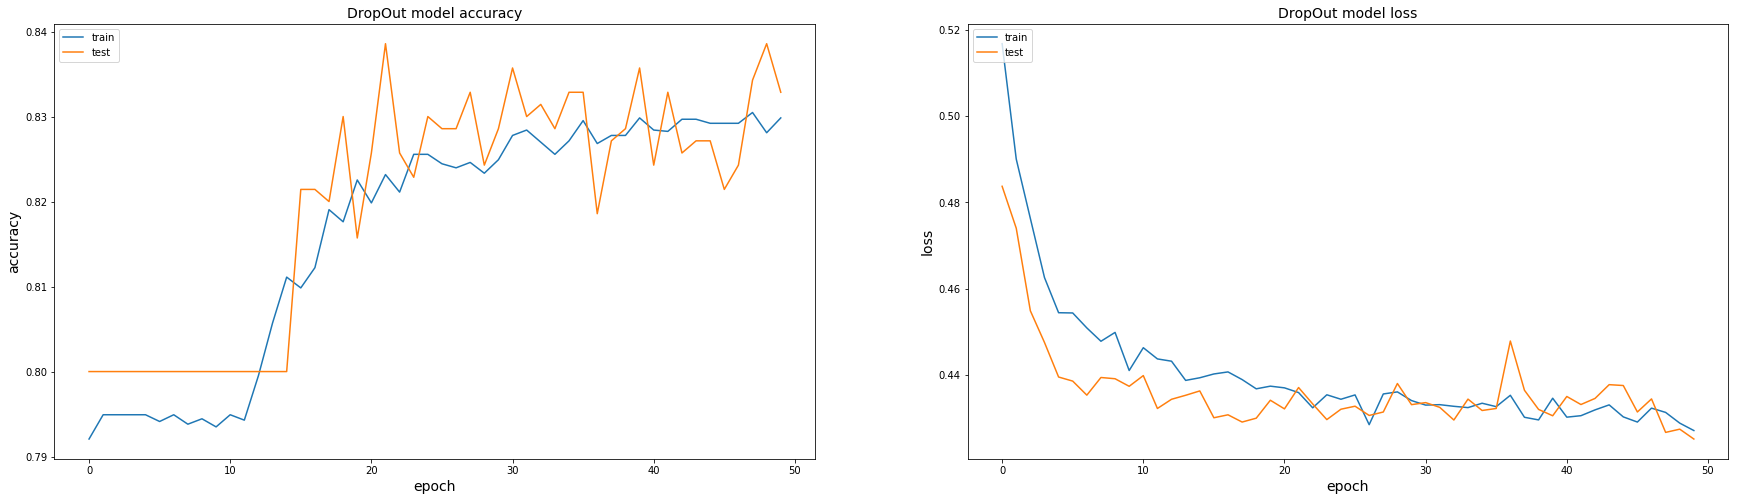

In [53]:
Model5 = Sequential()
#Model5.add(Dropout(0.2, input_shape=(11,)))
Model5.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu', input_dim=11))
#Model5.add(Dropout(0.2))
Model5.add(Dense(4, kernel_initializer  = 'uniform', activation = 'sigmoid'))
Model5.add(Dropout(0.2))
Model5.add(Dense(1, kernel_initializer  = 'uniform', activation = 'sigmoid'))
RMS=RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.00)
Model5.compile(optimizer = RMS , loss = 'binary_crossentropy', metrics = ['accuracy'])
#Model5.compile(optimizer = 'adam' , loss = 'binary_crossentropy', metrics = ['accuracy'])
#fitting the neural Network
history5=Model5.fit(X_train, Y_train,  batch_size=32, epochs = 50, verbose=0, validation_split=0.1, shuffle=True)
score5 = Model5.evaluate(X_validation, Y_validation, verbose=1)
print('Accuracy: ', score5[1]*100)
print( 'loss:', score5[0]*100)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(30, 8))
# summarize history for accuracy
ax1.plot(history5.history['acc'])
ax1.plot(history5.history['val_acc'])
ax1.set_title('DropOut model accuracy', fontsize=14)
ax1.set_ylabel('accuracy', fontsize=14)
ax1.set_xlabel('epoch', fontsize=14)
ax1.legend(['train', 'test'], loc='upper left')
# summarize history for loss
ax2.plot(history5.history['loss'])
ax2.plot(history5.history['val_loss'])
ax2.set_title('DropOut model loss', fontsize=14)
ax2.set_ylabel('loss', fontsize=14)
ax2.set_xlabel('epoch', fontsize=14)
ax2.legend(['train', 'test'], loc='upper left')

### 9.b Reguarization

3000/3000 [==============================] - 0s 18us/step
Accuracy:  80.6333333492
loss: 47.4034104268


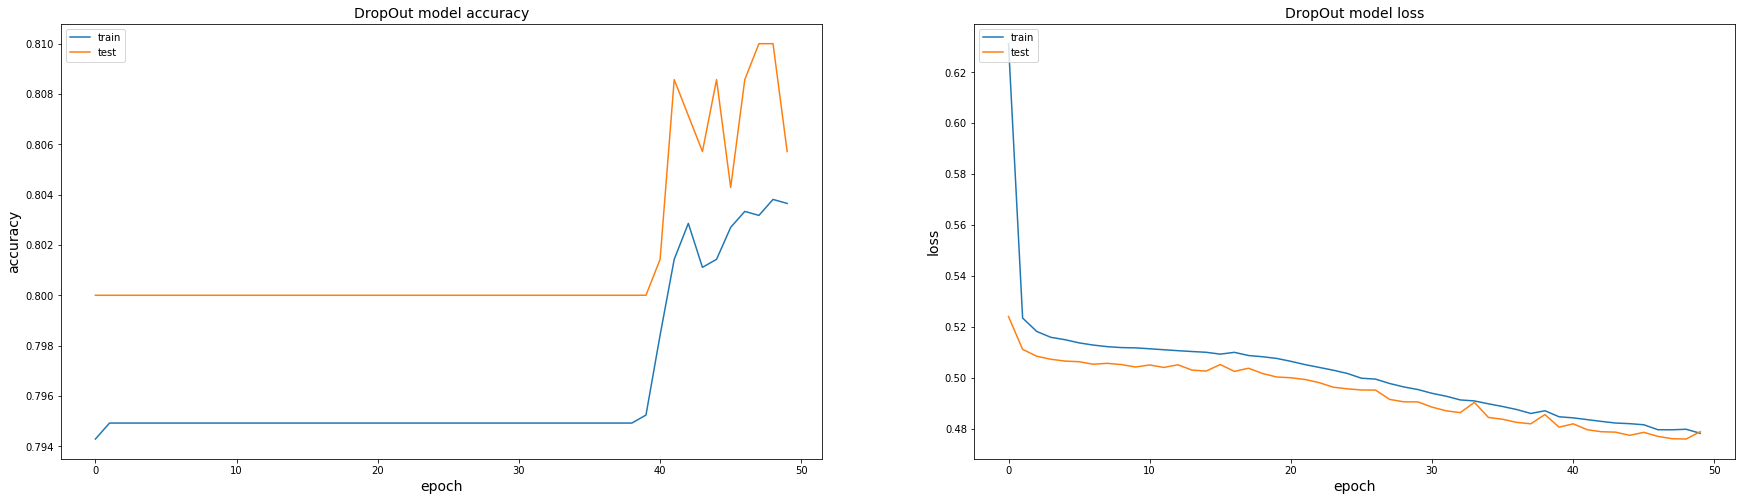

In [49]:
Model6 = Sequential()
Model6.add(Dense(16, input_dim=11, kernel_initializer='normal',kernel_regularizer=regularizers.l2(0.01), activation='relu'))
Model6.add(Dense(8, input_dim=11, kernel_initializer='normal',kernel_regularizer=regularizers.l2(0.01), activation='relu'))
Model6.add(Dense(4, input_dim=11, kernel_initializer='normal',kernel_regularizer=regularizers.l2(0.01), activation='relu'))
Model6.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
Model6.compile(optimizer = 'adam' , loss = 'binary_crossentropy', metrics = ['accuracy'])
#fitting the neural Network
history6=Model6.fit(X_train, Y_train,  batch_size=32, epochs = 50, verbose=0, validation_split=0.1, shuffle=True)
score6 = Model6.evaluate(X_validation, Y_validation, verbose=1)
print('Accuracy: ', score6[1]*100)
print( 'loss:', score6[0]*100)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(30, 8))
# summarize history for accuracy
ax1.plot(history6.history['acc'])
ax1.plot(history6.history['val_acc'])
ax1.set_title('DropOut model accuracy', fontsize=14)
ax1.set_ylabel('accuracy', fontsize=14)
ax1.set_xlabel('epoch', fontsize=14)
ax1.legend(['train', 'test'], loc='upper left')
# summarize history for loss
ax2.plot(history6.history['loss'])
ax2.plot(history6.history['val_loss'])
ax2.set_title('DropOut model loss', fontsize=14)
ax2.set_ylabel('loss', fontsize=14)
ax2.set_xlabel('epoch', fontsize=14)
ax2.legend(['train', 'test'], loc='upper left')

### 9.c Early Stopping

3000/3000 [==============================] - 0s 30us/step
Accuracy:  82.5666666826
loss: 42.644124039


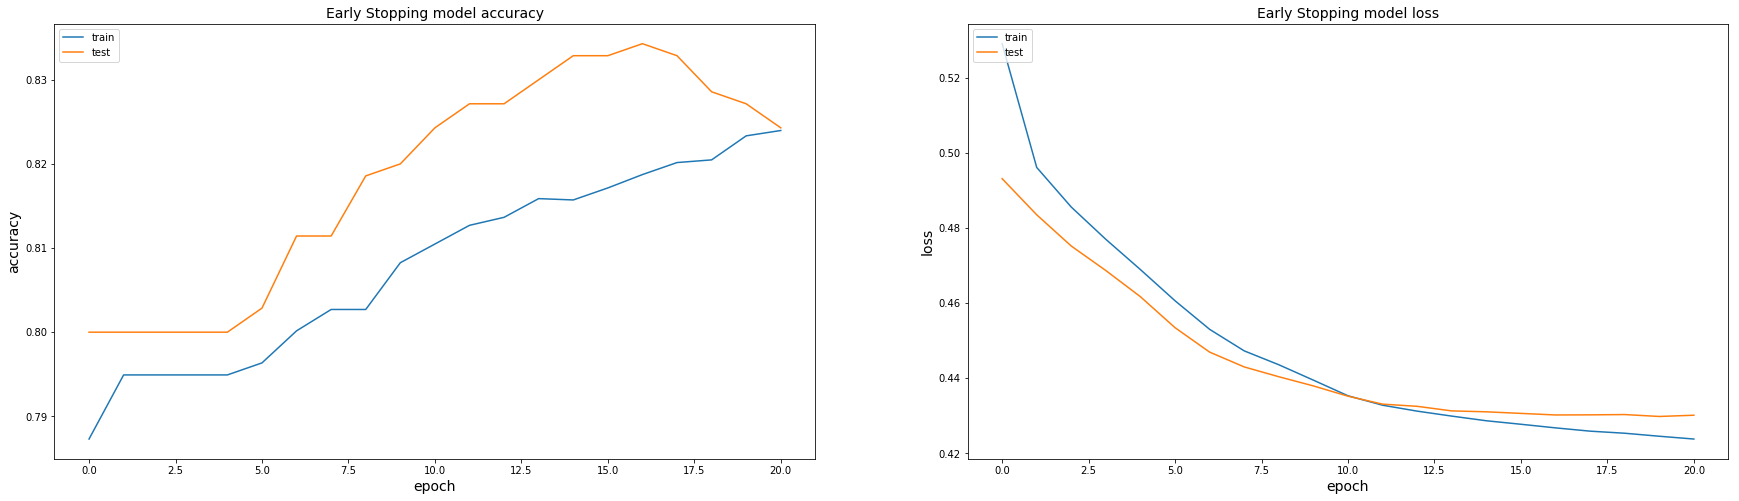

In [59]:
from keras.callbacks import EarlyStopping  
early_stop_crit = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.1, 
                                                patience=20, verbose=0, mode='auto')
Model7 = Sequential()
Model7.add(Dense(16, input_dim=11, kernel_initializer='normal', activation='relu'))
Model7.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
Model7.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
history7=Model7.fit(X_train, Y_train, validation_split=0.1, epochs=100, batch_size=32, verbose=0, callbacks=[early_stop_crit],shuffle=False)
score7 = Model7.evaluate(X_validation, Y_validation, verbose=1)
print('Accuracy: ', score7[1]*100)
print( 'loss:', score7[0]*100)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(30, 8))
# summarize history for accuracy
ax1.plot(history7.history['acc'])
ax1.plot(history7.history['val_acc'])
ax1.set_title('Early Stopping model accuracy', fontsize=14)
ax1.set_ylabel('accuracy', fontsize=14)
ax1.set_xlabel('epoch', fontsize=14)
ax1.legend(['train', 'test'], loc='upper left')
# summarize history for loss
ax2.plot(history7.history['loss'])
ax2.plot(history7.history['val_loss'])
ax2.set_title('Early Stopping model loss', fontsize=14)
ax2.set_ylabel('loss', fontsize=14)
ax2.set_xlabel('epoch', fontsize=14)
ax2.legend(['train', 'test'], loc='upper left')

### 9.d Learning Rate

3000/3000 [==============================] - 0s 33us/step
Accuracy:  83.6333333333
loss: 40.752883331


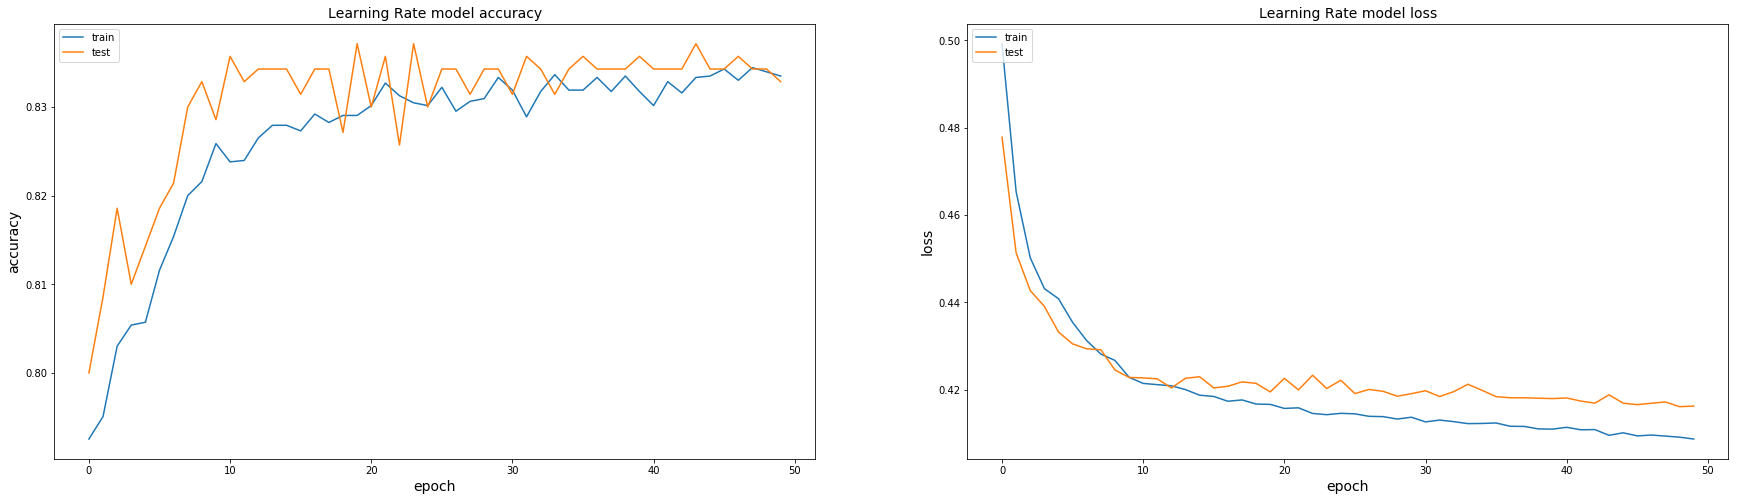

In [62]:
# Define Laerning Rate Parameters
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

Model8 = Sequential()
Model8.add(Dense(16, input_dim=11, kernel_initializer='normal', activation='relu'))
Model8.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
Model8.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Fit the model
history8= Model8.fit(X_train, Y_train, validation_split=0.1, epochs=epochs, batch_size=32, verbose=0)
score8 = Model8.evaluate(X_validation, Y_validation, verbose=1)
print('Accuracy: ', score8[1]*100)
print( 'loss:', score8[0]*100)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(30, 8))
# summarize history for accuracy
ax1.plot(history8.history['acc'])
ax1.plot(history8.history['val_acc'])
ax1.set_title('Learning Rate model accuracy', fontsize=14)
ax1.set_ylabel('accuracy', fontsize=14)
ax1.set_xlabel('epoch', fontsize=14)
ax1.legend(['train', 'test'], loc='upper left')
# summarize history for loss
ax2.plot(history8.history['loss'])
ax2.plot(history8.history['val_loss'])
ax2.set_title('Learning Rate model loss', fontsize=14)
ax2.set_ylabel('loss', fontsize=14)
ax2.set_xlabel('epoch', fontsize=14)
ax2.legend(['train', 'test'], loc='upper left')

# My Final Model..Yay!

3000/3000 [==============================] - 0s 37us/step
Accuracy:  83.6333333333
loss: 40.752883331


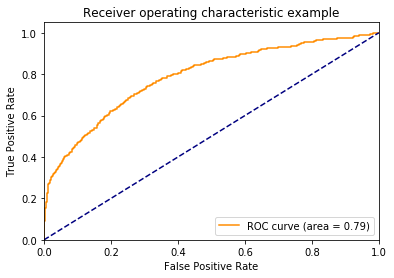

,Count,Target_sum,Non_Target_sum,cum_target,cum_non_target,PDist_target,PDist_non_target,Spread,max_ks
0,300,206,94,68.67%,31.33%,34.05%,3.92%,30.12,
1,300,99,201,33.00%,67.00%,50.41%,12.32%,38.10,
2,300,77,223,25.67%,74.33%,63.14%,21.63%,41.51,
3,300,68,232,22.67%,77.33%,74.38%,31.32%,43.06,<----
4,300,46,254,15.33%,84.67%,81.98%,41.92%,40.06,
5,300,33,267,11.00%,89.00%,87.44%,53.07%,34.37,
6,300,25,275,8.33%,91.67%,91.57%,64.55%,27.02,
7,300,17,283,5.67%,94.33%,94.38%,76.37%,18.01,
8,300,18,282,6.00%,94.00%,97.36%,88.14%,9.21,
9,300,16,284,5.33%,94.67%,100.00%,100.00%,0.00,


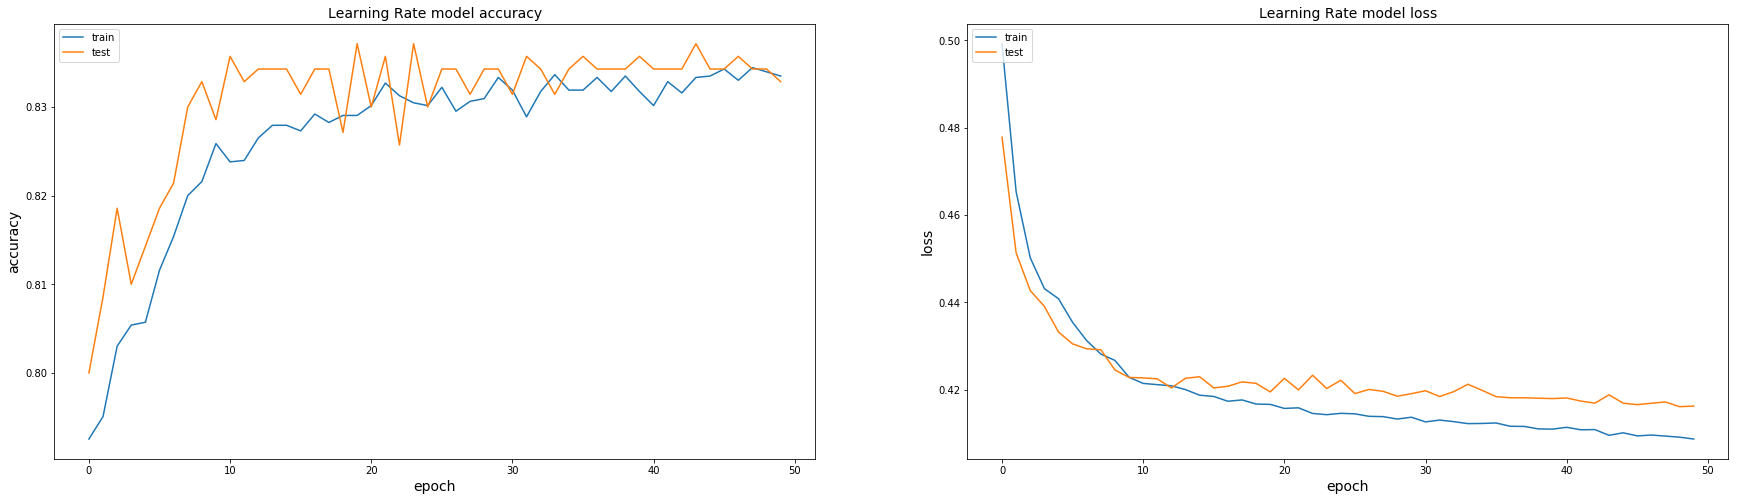

In [72]:
ModelF = Sequential()
ModelF.add(Dense(16, input_dim=11, kernel_initializer='normal', activation='relu'))
ModelF.add(Dense(8, input_dim=11, kernel_initializer='normal', activation='relu'))
ModelF.add(Dropout(0.2))
ModelF.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
sgd = SGD(lr=0.1, momentum=0.8, decay=decay_rate, nesterov=False)
ModelF.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Fit the model
historyF= ModelF.fit(X_train, Y_train, validation_split=0.1, epochs=epochs, batch_size=32, verbose=0, callbacks=[early_stop_crit])
scoreF = ModelF.evaluate(X_validation, Y_validation, verbose=1)
print('Accuracy: ', score8[1]*100)
print( 'loss:', score8[0]*100)

#ROC plot
y_pred = ModelF.predict_proba(X_validation)
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr1, tpr1, _ = roc_curve(Y_validation, y_pred)
roc_auc1 = auc(fpr1, tpr1)
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#epochs
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(30, 8))
# summarize history for accuracy
ax1.plot(history8.history['acc'])
ax1.plot(history8.history['val_acc'])
ax1.set_title('Learning Rate model accuracy', fontsize=14)
ax1.set_ylabel('accuracy', fontsize=14)
ax1.set_xlabel('epoch', fontsize=14)
ax1.legend(['train', 'test'], loc='upper left')
# summarize history for loss
ax2.plot(history8.history['loss'])
ax2.plot(history8.history['val_loss'])
ax2.set_title('Learning Rate model loss', fontsize=14)
ax2.set_ylabel('loss', fontsize=14)
ax2.set_xlabel('epoch', fontsize=14)
ax2.legend(['train', 'test'], loc='upper left')

#Calculate the KS statistic
Y_nonTarget = 1-Y_validation
y_pred = np.reshape(y_pred, (3000,))
temp_df = pd.DataFrame({'Probability': y_pred,'Target': Y_validation, 'Non_Target':Y_nonTarget})
#temp_df['rank'] = temp_df['Probability'].rank(method='first')
temp_df['deciles'] = pd.qcut(temp_df['Probability'], 10)
grouped = temp_df.groupby('deciles', as_index = False)
agg1 = pd.DataFrame(grouped.min().Probability, columns = ['min_scr'])
agg1['max_scr'] = grouped.max().Probability
agg1['Target_sum'] = grouped.sum().Target
agg1['Non_Target_sum'] = grouped.sum().Non_Target
agg1['Count'] = agg1.Non_Target_sum + agg1.Target_sum
agg2 = (agg1.sort_values(by = 'max_scr', ascending=False)).reset_index(drop = True)
agg2['cum_target'] = (agg2.Target_sum / agg2.Count).apply('{0:.2%}'.format)
agg2['cum_non_target'] = (agg2.Non_Target_sum / agg2.Count).apply('{0:.2%}'.format)
agg2['PDist_target']=((agg2.Target_sum / temp_df.Target.sum()).cumsum()).apply('{0:.2%}'.format)
agg2['PDist_non_target']=((agg2.Non_Target_sum / temp_df.Non_Target.sum()).cumsum()).apply('{0:.2%}'.format)
#agg2['Pct_target'] = (agg1.Target_sum / agg2.Count).apply('{0:.2%}'.format)
agg2['Spread']=(np.round(((agg2.Target_sum / temp_df.Target.sum()).cumsum() - (agg2.Non_Target_sum / temp_df.Non_Target.sum()).cumsum())*100, 2))
flag = lambda x: '<----' if x == agg2.Spread.max() else ''
# FLAG OUT MAX KS
agg2['max_ks'] = agg2.Spread.apply(flag)
agg2=agg2.drop(['max_scr','min_scr' ], axis=1)
agg2 = agg2[['Count', 'Target_sum', 'Non_Target_sum', 'cum_target', 'cum_non_target','PDist_target','PDist_non_target','Spread','max_ks']]
agg2
